# Train NN model on the FashionMNIST data

https://www.kaggle.com/zalando-research/fashionmnist

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.

You may refer to this tutorial about the original Mnist:
https://towardsdatascience.com/handwritten-digit-mnist-pytorch-977b5338e627

Or any other tutorial you may find online:
https://www.kaggle.com/zalando-research/fashionmnist/code

In [6]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
import torch.nn.functional as F
from torchvision.transforms import ToTensor, Lambda, Compose
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

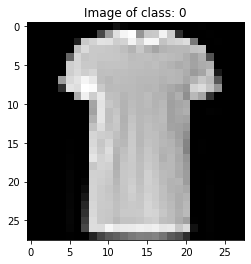

In [10]:
# Lest read a random image from the dataset and draw it
image, label = training_data[17]
plt.imshow(image[0], "gray")
plt.title(f"Image of class: {label}")
plt.show()

In [11]:
# Lets check image shape
image.shape

torch.Size([1, 28, 28])

In [12]:
# Lets see all the classes available
training_data.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

# Task 1:

Create a DataLoader objects for train and test

In [13]:
train_loader = DataLoader(training_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)
device = torch.device('cpu')

# Task 2:

Create a Neural Network

In [14]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)
    def forward(self, x):
        x = x.reshape(-1, 784)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return F.log_softmax(self.fc3(x), dim = 1)


model = Net()


# Task 3:

Specify loss and optimizer

In [15]:
import torch.optim as optim
loss_criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Task 3:

Train model using for loop

In [16]:
for epoch in range(10):
  running_loss = 0
  for batch, (X, y) in enumerate(train_loader):
    X, y = X.to(device), y.to(device)
    
    pred = model.forward(X)
    loss = loss_criterion(pred, y)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    running_loss += loss.item()
  #if batch % 10 == 0:
  print(f"epoch={epoch + 1},  loss={running_loss/len(train_loader)}")
      #running_loss = 0.0


epoch=1,  loss=0.49578496713240944
epoch=2,  loss=0.3612698045492172
epoch=3,  loss=0.323868259370327
epoch=4,  loss=0.3027002205093702
epoch=5,  loss=0.28267666461467744
epoch=6,  loss=0.2665088693102201
epoch=7,  loss=0.2563508764823278
epoch=8,  loss=0.2413431467960278
epoch=9,  loss=0.23545628268420696
epoch=10,  loss=0.22399050171226262


# Task 4:

Report accuracy from train set, and test set independently

In [17]:
preds_train = torch.tensor([])
vals_train = torch.tensor([])
correct = 0
with torch.no_grad():
  for X, y in train_loader:
    X = X.view(-1, 784)
    out = model.forward(X)
    _, preds = torch.max(out, dim=1)
    correct += (preds == y).float().sum()
    preds_train = torch.cat((preds_train, model.forward(X)), 0)
    vals_train  = torch.cat((vals_train , y), 0)
train_acc = correct / len(training_data)
print("Accuracy on a train set: {:.0f}%".format(100*train_acc))

Accuracy on a train set: 91%


In [18]:
preds_test = torch.tensor([])
vals_test  = torch.tensor([])
correct = 0
with torch.no_grad():
  for X, y in test_loader:
    X = X.view(-1, 784)
    out = model.forward(X)
    _, preds = torch.max(out, dim=1)
    correct += (preds == y).float().sum()
    preds_test = torch.cat((preds_test, model.forward(X)), 0)
    vals_test  = torch.cat((vals_test , y), 0)
test_acc = correct / len(test_data)
print("Accuracy on a test set: {:.0f}%".format(100*test_acc))

Accuracy on a test set: 88%


# Task 5:

Report confussion matrix for the test set

Expected format:
```
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])
```

In [19]:

_, preds = torch.max(preds_test, dim=1)
conf_matrix = confusion_matrix(vals_test.numpy(), preds.numpy())
print('Confusion matrix for the test set')
print(conf_matrix)

Confusion matrix for the test set
[[856   0  32  28   2   0  80   0   2   0]
 [  4 967   2  21   3   0   2   0   1   0]
 [ 11   0 880  15  39   0  55   0   0   0]
 [ 17   3  12 928  18   0  18   0   4   0]
 [  0   0 192  43 658   0 107   0   0   0]
 [  0   0   0   1   0 984   0  13   0   2]
 [135   0 109  43  32   0 679   0   2   0]
 [  0   0   0   0   0  25   0 952   0  23]
 [  7   0   6   6   1   5   4   4 967   0]
 [  0   0   0   0   0  20   1  30   0 949]]


# Task 6 (optional):

Train LogisticRegression and DecisionTree models on the same data
Compare their performance to the NN

In [21]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
train_dataset = training_data.data.reshape(-1, 784).numpy()
training_dataset_labels = training_data.targets.numpy()
test_dataset = test_data.data.reshape(-1, 784).numpy()
test_dataset_labels = test_data.targets.numpy()
decision_tree.fit(train_dataset, training_dataset_labels)
decision_tree_pred = decision_tree.predict(test_dataset)
decision_tree_acc = (decision_tree_pred == test_dataset_labels).sum() / len(decision_tree_pred)
print("Accuracy of decision tree on a test set: {:.0f}%".format(100*decision_tree_acc))

Accuracy of decision tree on a test set: 79%


In [22]:
class LogisticRegression(nn.Module):
    def __init__(self):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(784, 10)
    def forward(self, x):
        x = x.reshape(-1, 784)
        return torch.sigmoid(self.linear(x))


In [23]:
logistic_regression = LogisticRegression()

for epoch in range(10):
  for batch, (X, y) in enumerate(train_loader):
    X, y = X.to(device), y.to(device)
      
    pred = logistic_regression.forward(X)
    loss = loss_criterion(pred, y)
      
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  print(f"Epoch {epoch + 1}\n")

Epoch 1

Epoch 2

Epoch 3

Epoch 4

Epoch 5

Epoch 6

Epoch 7

Epoch 8

Epoch 9

Epoch 10



In [126]:
log_preds = torch.tensor([])
with torch.no_grad():
    for (X, y) in test_loader:
        log_preds = torch.cat((log_preds, logistic_regression.forward(X)), 0)
        
_, preds = torch.max(log_preds, dim=1)
log_acc = torch.tensor(torch.sum(preds == vals_test).item() / len(preds))    
print("Accuracy of logistic regression on a test set: {:.0f}%".format(100*log_acc))

Accuracy of logistic regression on a test set: 11%
